In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib widget

In [3]:
# Set up directory paths
from pathlib import Path
root = Path.cwd().parent

DATA_DIR = root/'Dataset'
OUTPUT=root/'Results'/'Figures'

# Read in global gas geochemistry data
gggi = pd.read_csv(DATA_DIR/"Global_Gas_Geochemistry_Inventory_2017.csv")

# Filter data for Pennsylvania
gg_pa = gggi[gggi['STATE_REGION'] == "pennsylvania"]

# Separate conventional and unconventional data
pa_conventional = gg_pa[gg_pa['TYPE'] == "conventional"].copy()
pa_conventional['C1C2'] = pa_conventional['C1_pct'] / (pa_conventional['C2_pct'] + pa_conventional['C3_pct'])

pa_unconventional = gg_pa[gg_pa['TYPE'] == "shale"].copy()
pa_unconventional['C1C2'] = pa_unconventional['C1_pct'] / (pa_unconventional['C2_pct'] + pa_unconventional['C3_pct'])

In [4]:
# Statistics on CH4
print("Conventional CH4 Statistics:")
print("Mean:", pa_conventional['d13C_CH4'].mean())
print("Median:", pa_conventional['d13C_CH4'].median())
print("Min:", pa_conventional['d13C_CH4'].min())
print("Max:", pa_conventional['d13C_CH4'].max())

Conventional CH4 Statistics:
Mean: -39.375
Median: -40.71
Min: -47.56
Max: -26.54


In [5]:
# Read groundwater data 
gw_data = pd.read_csv(DATA_DIR/"2024_swpa_dataset.csv")

# Read isotopic data
isotech = pd.read_csv(DATA_DIR/"Isotech_data.csv")

In [6]:
isotech

,Isotech,Site ID,GC,He,H2,Ar,O2,CO2,N2,CO,...,δ13C1,δDC1,Dissolved_CH4 _cc/L,CH4_mg/L,Dissolved_C2H6_cc/L,C2H6_mg/L,Dissolved_C3H8_cc/L,C3H8_mg/L,Helium dilution,Comments
0,930068.0,Sample_030,8/9/2024,na,nd,1.250,7.09,1.560,67.00,nd,...,-74.26,-202.3,7.9,5.30,0.01200,0.01500,<0.0001,<0.0002,0.69,dissolved gas ppm=dissolved gas mg/L
1,930874.0,Sample_053,8/19/2024,na,nd,1.030,5.18,0.500,40.29,nd,...,-63.50,-198.4,8.9,6.00,0.03400,0.04300,<0.0001,<0.0002,0.85,NaN
2,930876.0,Sample_055,8/19/2024,na,nd,0.688,6.00,4.140,34.03,nd,...,-64.31,-188.0,19.0,13.00,0.19000,0.24000,0.003,0.0054,0.69,dissolved gas ppm=dissolved gas mg/L.
3,939672.0,Sample_086,10/11/2024,na,nd,0.330,2.16,0.054,17.24,nd,...,-65.20,-219.3,84.0,56.00,0.45000,0.56000,<0.0001,<0.0002,0.00,NaN
4,939673.0,Sample_087,10/11/2024,na,nd,1.430,5.37,5.500,79.64,nd,...,-65.87,-153.9,2.4,1.60,0.00073,0.00092,<0.0001,<0.0002,0.73,NaN
5,925749.0,Sample_013,6/19/2024,na,nd,1.290,0.95,0.320,61.91,nd,...,-70.18,-194.7,14.0,9.40,0.07700,0.09700,<0.0001,<0.0002,0.63,dissolved gas ppm=dissolved gas mg/L.
6,925754.0,Sample_017,6/19/2024,na,nd,0.516,3.34,9.270,30.04,nd,...,-51.50,-174.7,20.0,13.00,0.35000,0.44000,0.0002,0.0004,0.71,dissolved gas ppm=dissolved gas mg/L. Insuffic...
7,925758.0,Sample_021,6/19/2024,na,nd,1.710,4.81,1.450,86.88,nd,...,-77.16,-204.0,1.5,0.99,0.00036,0.00046,<0.0001,<0.0002,0.74,dissolved gas ppm=dissolved gas mg/L.
8,925759.0,Sample_022,6/19/2024,na,nd,1.440,6.26,15.840,68.94,nd,...,-46.20,-118.2,2.0,1.30,0.00120,0.00140,<0.0001,<0.0002,0.75,dissolved gas ppm=dissolved gas mg/L.


In [7]:
gw_data.columns

Index(['Site ID', 'Longitude', 'Latitude', 'Sample Group', 'Date',
       'Time Sampled', 'Source', 'Temp', 'DO', 'SC', 'Field pH', 'Lab pH',
       'Alkalinity', 'Gas Rover Reading', 'F', 'Cl', 'SO4', 'Br', 'NO3', 'Al',
       'Ba', 'Ca', 'Fe', 'K', 'Mg', 'Mn', 'Na', 'P', 'Si', 'Sr', 'Ti', 'Li',
       'Be', 'Ni', 'Cu', 'As', 'Sr.1', 'Cd', 'Tl', 'Pb', 'U', '87Sr/86Sr',
       '87Sr/86Sr Error', '87Sr/86Sr Ratio', 'Benzene', 'Toluene',
       'Ethylbenzene', 'm,p-Xylene', 'o-Xylene', 'Methane', 'Ethane',
       'Propane', 'δ13C1(‰)', 'δDC1(‰)', 'δ13C2(‰)', 'DIC (mg C/L)',
       'DIC (SD)', 'DIC (mol/L C)', '[H+]', '[OH-]', 'a0 [H2CO3]',
       'a1 [HCO3-]', 'a2 [CO32-]', 'Alk (eq/L)', 'Alk (mg CaCO3/L)',
       'NEAR_UOG_DIST', 'Impoundment_DIST', 'Recent_Spill_DIST', 'TPI300',
       'Near_Road_DIST', 'NEAR_MINE_DIST', 'NEAR_COG_DIST'],
      dtype='object')

In [8]:
# Process groundwater isotope data
gw_isotope = gw_data[~gw_data['δ13C1(‰)'].isna()].copy()
gw_isotope['Methane'] = gw_isotope['Methane'].replace(">6", 6).astype(float)
gw_isotope['C1C2'] = gw_isotope['Methane'] / gw_isotope['Ethane'].astype(float)

# Join full isotopic data
gw_isotope_full = pd.merge(
    gw_isotope, isotech, on="Site ID", how="left"
)
gw_isotope_full['C3'] = gw_isotope_full['C3'].replace("nd", 0).astype(float)
gw_isotope_full['C1C2_molpct'] = gw_isotope_full['C1'] / (gw_isotope_full['C2'] + gw_isotope_full['C3'])

In [9]:
# Grouping by sample type
sample_groups = gw_isotope_full['Sample Group'].unique()
print("Sample Groups:", sample_groups)

# Create new groupings
control = gw_isotope_full[gw_isotope_full['Sample Group'].isin(["C"])]
hotspot = gw_isotope_full[gw_isotope_full['Sample Group'].isin(["HS", "HS/S", "HS/I"])]
spill = gw_isotope_full[gw_isotope_full['Sample Group'].isin(["S", "HS/S"])]
impoundment = gw_isotope_full[gw_isotope_full['Sample Group'].isin(["I", "HS/I"])]
extra = gw_isotope_full[gw_isotope_full['Sample Group'].isin(["Extra"])]

Sample Groups: ['Extra' 'C' 'I' 'S']


In [10]:
### Stack control, spill and impoundment
control['treatment'] = "Control"
spill['treatment'] = "Spill"
impoundment['treatment'] = "Impoundment"
data_stack = pd.concat([control, spill, impoundment])

C:\Users\jsu124\AppData\Local\Temp\ipykernel_36960\2066765340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['treatment'] = "Control"
C:\Users\jsu124\AppData\Local\Temp\ipykernel_36960\2066765340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spill['treatment'] = "Spill"
C:\Users\jsu124\AppData\Local\Temp\ipykernel_36960\2066765340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [11]:
data_stack.head()

,Site ID,Longitude,Latitude,Sample Group,Date,Time Sampled,Source,Temp,DO,SC,...,Dissolved_CH4 _cc/L,CH4_mg/L,Dissolved_C2H6_cc/L,C2H6_mg/L,Dissolved_C3H8_cc/L,C3H8_mg/L,Helium dilution,Comments,C1C2_molpct,treatment
1,Sample_017,-80.38,40.16,C,2024-05-29,16:00:00,well,14.6,0.345,970.0,...,20.0,13.00,0.35000,0.44000,0.0002,0.0004,0.71,dissolved gas ppm=dissolved gas mg/L. Insuffic...,62.391256,Control
3,Sample_022,-80.17,40.07,S,2024-05-31,11:15:00,well,14.5,1.210,871.0,...,2.0,1.30,0.00120,0.00140,<0.0001,<0.0002,0.75,dissolved gas ppm=dissolved gas mg/L.,1928.205128,Spill
7,Sample_086,-80.30,40.05,S,2024-09-17,09:00:00,well,13.5,0.331,1615.0,...,84.0,56.00,0.45000,0.56000,<0.0001,<0.0002,0.00,NaN,209.527559,Spill
8,Sample_087,-80.25,40.03,S,2024-09-17,11:15:00,well,17.0,0.367,563.0,...,2.4,1.60,0.00073,0.00092,<0.0001,<0.0002,0.73,NaN,3663.636364,Spill
2,Sample_021,-80.36,40.21,I,2024-05-30,13:55:00,well,15.1,0.341,712.0,...,1.5,0.99,0.00036,0.00046,<0.0001,<0.0002,0.74,dissolved gas ppm=dissolved gas mg/L.,4672.727273,Impoundment


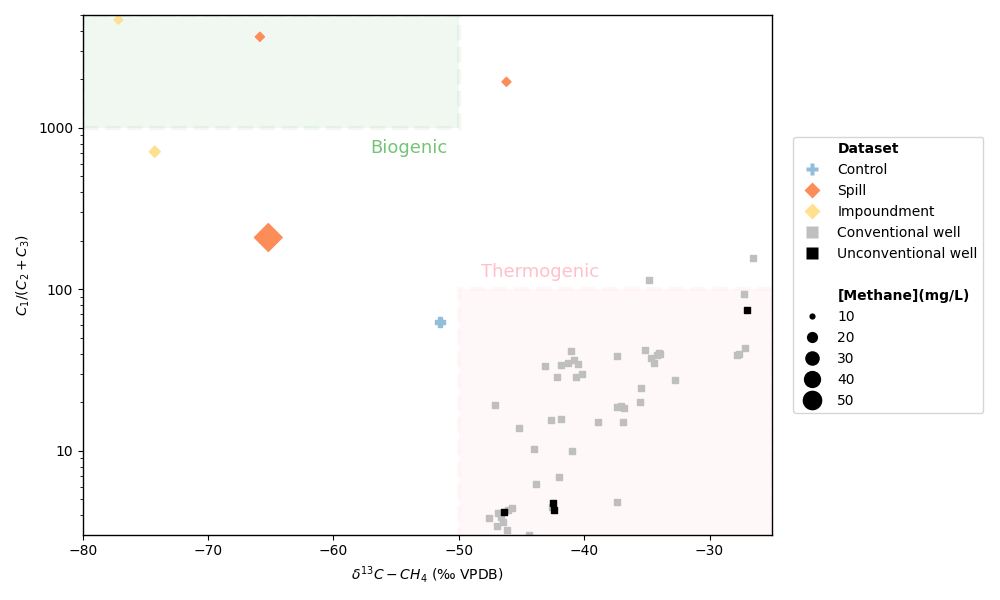

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np
import matplotlib.ticker as mticker
from matplotlib.ticker import LogLocator
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# --- helpers -------------------------------------------------
def scale_sizes(vals, smin=20, smax=200):
    v = (vals - vals.min()) / (vals.max() - vals.min())
    return smin + v * (smax - smin)          # area in points^2 for scatter

def area_to_markersize(area):
    return np.sqrt(area)                      

# color map for groups
color_map = {
    "Control": "#91bfdb",
    "Spill":   "#fc8d59",
    "Impoundment": "#fee090"
}

# shape map for groups
shape_map = {
    "Control": "P",        # plus
    "Spill":   "D",        # diamond
    "Impoundment": "D"     # diamond
}


fig, ax = plt.subplots(figsize=(10, 6))

# Remove grid
ax.grid(False)

# Black spines (borders)
for spine in ax.spines.values():
    spine.set_visible(True)       # spines 
    spine.set_color("black")      # black border
    spine.set_linewidth(1.0)      # thickness

# shaded regions
ax.add_patch(Rectangle((-50, 0), 25, 100,  facecolor="pink", alpha=0.1, edgecolor="pink", linestyle="--", linewidth=3))
ax.add_patch(Rectangle((-80,1000),30,4000, facecolor="#74c476", alpha=0.1, edgecolor="#74c476", linestyle="--", linewidth=3))

# sizes for scatter
s_vals = scale_sizes(data_stack["Methane"])

# plot by group with fixed color
for grp, sub in data_stack.groupby("treatment"):
    ax.scatter(
        sub['δ13C1(‰)'], sub["C1C2_molpct"],
        s=s_vals.loc[sub.index],              # scaled by methane
        c=color_map.get(grp, "C0"),
        marker=shape_map.get(grp, "o"),       # shape by group
        alpha=1, label=grp
    )

# overlay well markers (fixed size; square) -------- use #808080 color for unconventional if the boxes are too dark
ax.scatter(pa_conventional["d13C_CH4"], pa_conventional["C1C2"],
        s=25, c="#bfbfbf", marker="s", alpha=1, label="Conventional well")
ax.scatter(pa_unconventional["d13C_CH4"], pa_unconventional["C1C2"],
        s=25, c="black",  marker="s", alpha=1, label="Unconventional well")

# axes, labels, scales
ax.set_yscale("log")
ax.set_xlabel(r"$\delta^{13}C-CH_4$ (‰ VPDB)")
ax.set_ylabel(r"$C_1 / (C_2 + C_3)$")

# Format log ticks as 10, 100, 1000 
ax.yaxis.set_major_locator(LogLocator(base=10))
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(mticker.NullFormatter())

# annotations
ax.annotate("Thermogenic", xy=(-43.5, 120),  color="pink",      fontsize=13, ha="center")
ax.annotate("Biogenic",    xy=(-54,  700), color="#74c476", fontsize=13, ha="center")

# Dummy header handles (invisible markers, only text shows up)
header_group   = Line2D([], [], linestyle="none", marker="", label="Dataset")
empty_line1    = Line2D([], [], linestyle="none", marker="", label="")   # blank line
empty_line2    = Line2D([], [], linestyle="none", marker="", label="")   # another blank line
header_methane = Line2D([], [], linestyle="none", marker="", label="[Methane](mg/L)")

# ---- Group legend ---------------------------------------
group_handles = [
    Line2D([0],[0], marker='P', linestyle='none', markerfacecolor=color_map["Control"],      markeredgecolor='none', markersize=8, label="Control"),
    Line2D([0],[0], marker='D', linestyle='none', markerfacecolor=color_map["Spill"],        markeredgecolor='none', markersize=8, label="Spill"),
    Line2D([0],[0], marker='D', linestyle='none', markerfacecolor=color_map["Impoundment"],  markeredgecolor='none', markersize=8, label="Impoundment"),
    Line2D([0],[0], marker='s', linestyle='none', markerfacecolor='#bfbfbf', markeredgecolor='none', markersize=8, label="Conventional well"),
    Line2D([0],[0], marker='s', linestyle='none', markerfacecolor='black',  markeredgecolor='none', markersize=8, label="Unconventional well"),
]

# --- Size handles ---------------------------------------------
levels = np.array([10,20,30,40,50])
lvl_areas = scale_sizes(levels, smin=20, smax=200)
lvl_ms = area_to_markersize(lvl_areas)

size_handles = [
    Line2D([0],[0], marker='o', linestyle='none', markerfacecolor='black',
        markeredgecolor='none', markersize=ms, label=f"{val}")
    for ms, val in zip(lvl_ms, levels)
]

# --- Combine with headers -------------------------------------
all_handles = [header_group] + group_handles + [empty_line1, header_methane] + size_handles
all_labels  = [h.get_label() for h in all_handles]

# One combined legend
combined_legend = ax.legend(
    handles=all_handles,
    labels=all_labels,
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
    frameon=True
)

# Style the headers 
for text in combined_legend.get_texts():
    if text.get_text() in ["Dataset", "[Methane](mg/L)"]:
        text.set_weight("bold")
        text.set_ha("left")
    elif text.get_text() == "":  
        text.set_text(" ")   # ensures empty lines still render


# tidy & show
ax.margins(x=0.02, y=0.05)
plt.autoscale(tight=True)
plt.tight_layout()
plt.savefig(OUTPUT/"Figure 2A.pdf", dpi=600, bbox_inches="tight", pad_inches=0.2)
plt.show()